<a href="https://colab.research.google.com/github/ttezy/Time-Sequence-Analysis/blob/main/FB_Prophet_Multivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step 1: Load Data**

## **Import libraries**

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime
import plotly.express as px
from sklearn.preprocessing import LabelEncoder


from fbprophet import Prophet

from sklearn.metrics import mean_squared_error
from math import sqrt

## **Load Dataset**

In [ ]:
df=pd.read_csv('pollution.csv',header=0, index_col=0)
df

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-01 00:00:00,0.0,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,0.0,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,0.0,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,0.0,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,0.0,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0


## **Visualize the data**

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f051c967dd0>,
      dtype=object)

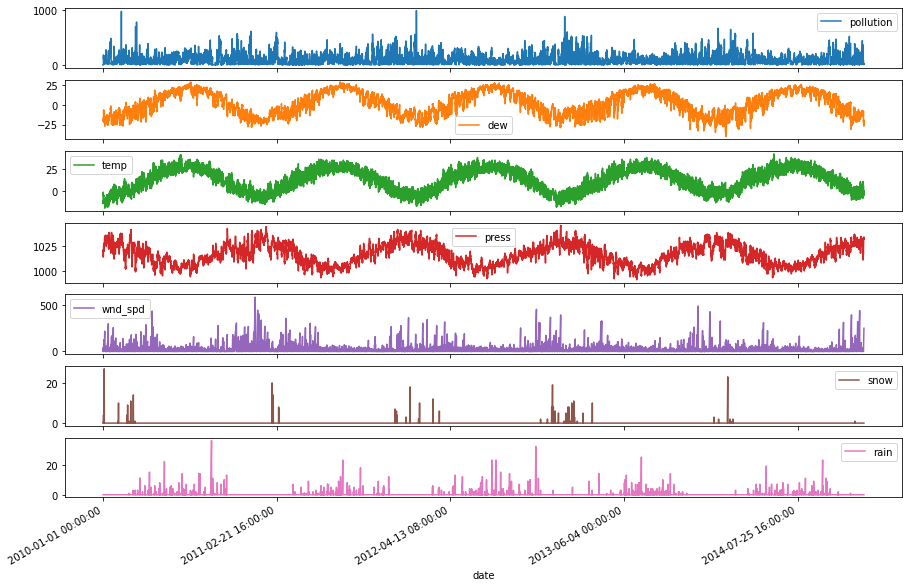

In [ ]:
df.plot(subplots=True, figsize=(15,10), legend=True)

# **Step 2: Preprocess the data**

## **Encode wind direction**

In [ ]:
values = df.values
# integer encode direction
encoder = LabelEncoder()
values[:, 4] = encoder.fit_transform(values[:, 4])
# ensure all data is float
values = values.astype('float32')

df['wnd_dir'] = values[:, 4]

df.head()

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-01 00:00:00,0.0,-21,-11.0,1021.0,1.0,1.79,0,0
2010-01-01 01:00:00,0.0,-21,-12.0,1020.0,1.0,4.92,0,0
2010-01-01 02:00:00,0.0,-21,-11.0,1019.0,1.0,6.71,0,0
2010-01-01 03:00:00,0.0,-21,-14.0,1019.0,1.0,9.84,0,0
2010-01-01 04:00:00,0.0,-20,-12.0,1018.0,1.0,12.97,0,0


## **Rename "date" as "ds" and "pollution" with "y"**

In [ ]:
df_processed = df.reset_index().rename({'date':'ds', 'pollution':'y'}, axis='columns')
df_processed.head()

,ds,y,dew,temp,press,wnd_dir,wnd_spd,snow,rain
0,2010-01-01 00:00:00,0.0,-21,-11.0,1021.0,1.0,1.79,0,0
1,2010-01-01 01:00:00,0.0,-21,-12.0,1020.0,1.0,4.92,0,0
2,2010-01-01 02:00:00,0.0,-21,-11.0,1019.0,1.0,6.71,0,0
3,2010-01-01 03:00:00,0.0,-21,-14.0,1019.0,1.0,9.84,0,0
4,2010-01-01 04:00:00,0.0,-20,-12.0,1018.0,1.0,12.97,0,0


## **Split the train set and the test set**

In [ ]:
# use first 90% data to train
n_train_hours = int(len(df_processed) * 0.9)
train = df_processed[:n_train_hours]
test = df_processed[n_train_hours:]

y_true = test['y'].values
test = test.drop(['y'], axis=1)

print("train shape:", train.shape)
print("test shape:", test.shape)
print("y_true shape:", y_true.shape)

train shape: (39441, 9)
test shape: (4383, 8)
y_true shape: (4383,)


# **Step 3: Train Prophet Model**

## **Show the columns' name**

In [ ]:
print(df_processed.columns)

Index(['ds', 'y', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow',
       'rain'],
      dtype='object')


## **Build prophet model**

In [ ]:
model = Prophet(interval_width=0.95)

# modify here to choose variates
model.add_regressor('dew')
model.add_regressor('temp')
model.add_regressor('press')
model.add_regressor('wnd_dir')
model.add_regressor('wnd_spd')
model.add_regressor('snow')

## **Fit model to the. train data**

In [ ]:
model.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [ ]:
model.params

{'beta': array([[ 6.45442401e-02,  1.91871385e-01, -6.99680547e-03,
          2.07036189e-03,  4.06052025e-03, -4.61078718e-03,
         -3.69665581e-03,  1.59543739e-03, -4.49541917e-03,
         -4.61730225e-03,  1.21861170e-03,  2.28944746e-03,
          3.26119716e-03, -2.88186570e-03,  7.79447571e-03,
          9.14400564e-04,  8.16483105e-03,  1.39255256e-03,
          8.03306586e-05, -5.23823415e-03,  1.15505565e-03,
          1.20372431e-03, -1.07754354e-03,  4.36054876e-04,
          1.08319955e-03,  9.81137867e-04, -2.26447019e-03,
          3.50210384e-03,  5.92274859e-05,  4.38259276e-03,
          1.36922748e-04, -6.69871939e-04, -3.24810910e-04,
         -5.04561636e-04,  1.23480273e-01, -6.53485976e-03,
         -1.79010615e-02,  4.89993108e-03, -3.53837117e-03,
         -3.87733687e-03]]),
 'delta': array([[ 3.91433721e-01, -1.62511342e-01,  2.05394413e-05,
         -1.51958978e+00,  7.20562262e-02, -2.74969586e-06,
          7.10757005e-01,  6.49921409e-01,  3.05331368

# **Step 4: Implement data forecasting**

## **Show the test set info**

In [ ]:
test.head()

,ds,dew,temp,press,wnd_dir,wnd_spd,snow,rain
39441,2014-07-02 09:00:00,21,22.0,1004.0,2.0,0.89,0,2
39442,2014-07-02 10:00:00,21,23.0,1004.0,3.0,0.89,0,0
39443,2014-07-02 11:00:00,21,24.0,1004.0,2.0,1.79,0,0
39444,2014-07-02 12:00:00,21,24.0,1003.0,2.0,3.58,0,0
39445,2014-07-02 13:00:00,21,25.0,1003.0,3.0,0.89,0,0


## **Predict future value**

In [ ]:
result = model.predict(test)
prediction = result['yhat']
print("prediction shape:", prediction.shape)

prediction shape: (4383,)


## **Calculate RMSE**

In [ ]:
rmse = sqrt(mean_squared_error(prediction, y_true))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 64.827


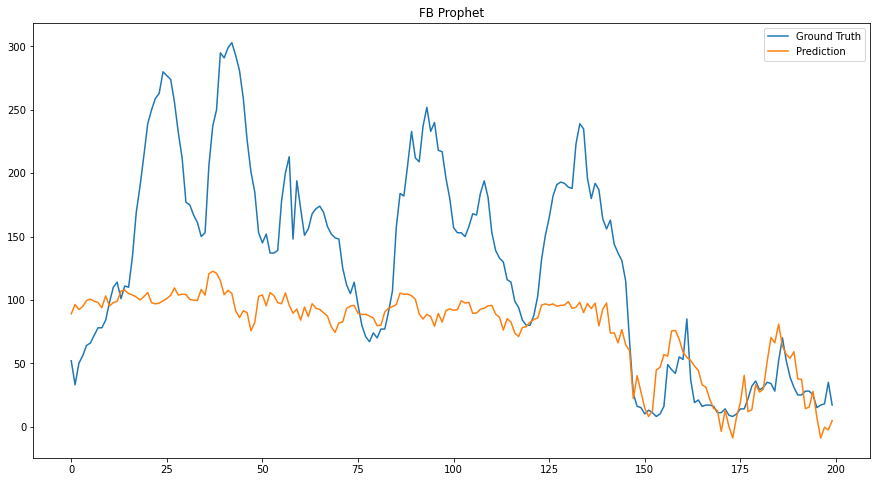

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(y_true[:200], label='Ground Truth')
plt.plot(prediction[:200], label='Prediction')
plt.title("FB Prophet")
plt.legend()
plt.show()

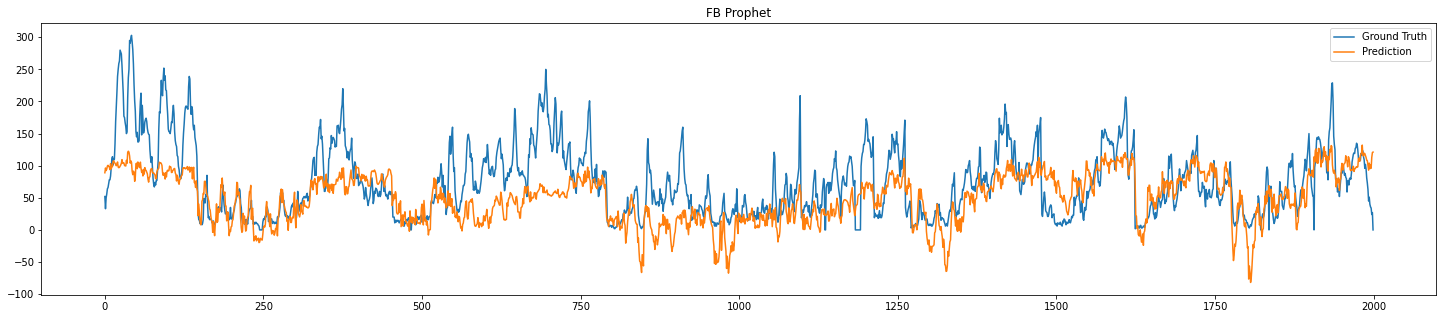

In [ ]:
plt.figure(figsize=(25, 5))
plt.plot(y_true[:2000], label='Ground Truth')
plt.plot(prediction[:2000], label='Prediction')
plt.title("FB Prophet")
plt.legend()
plt.show()

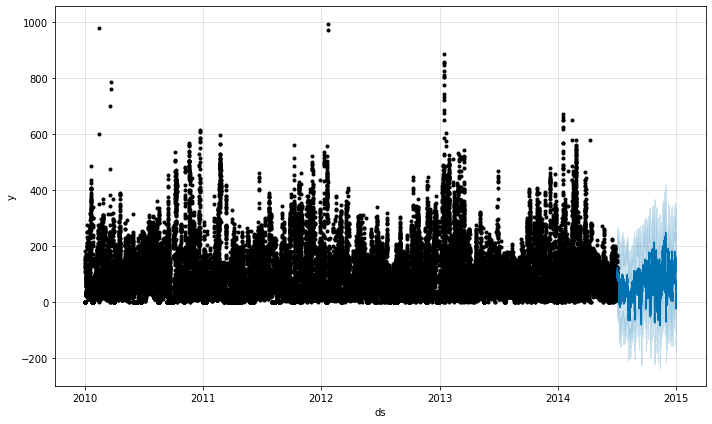

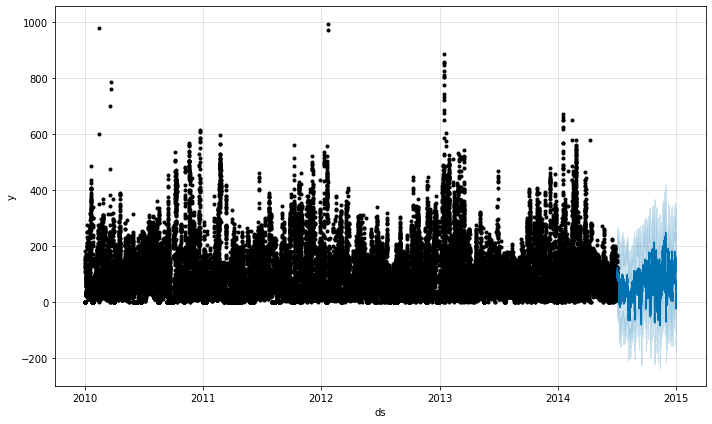

In [ ]:
model.plot(result)

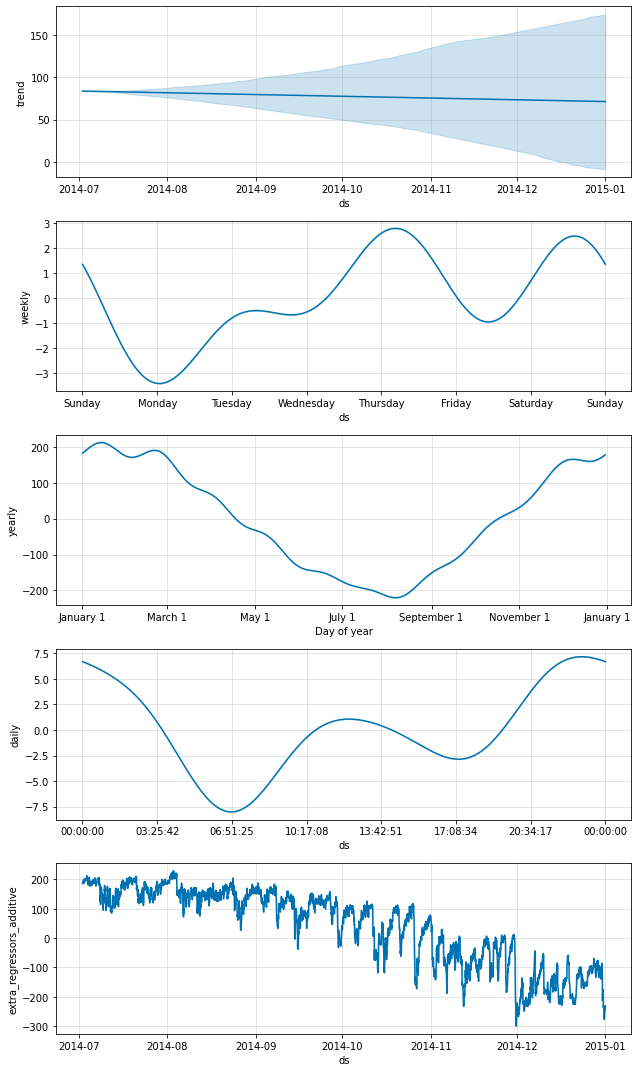

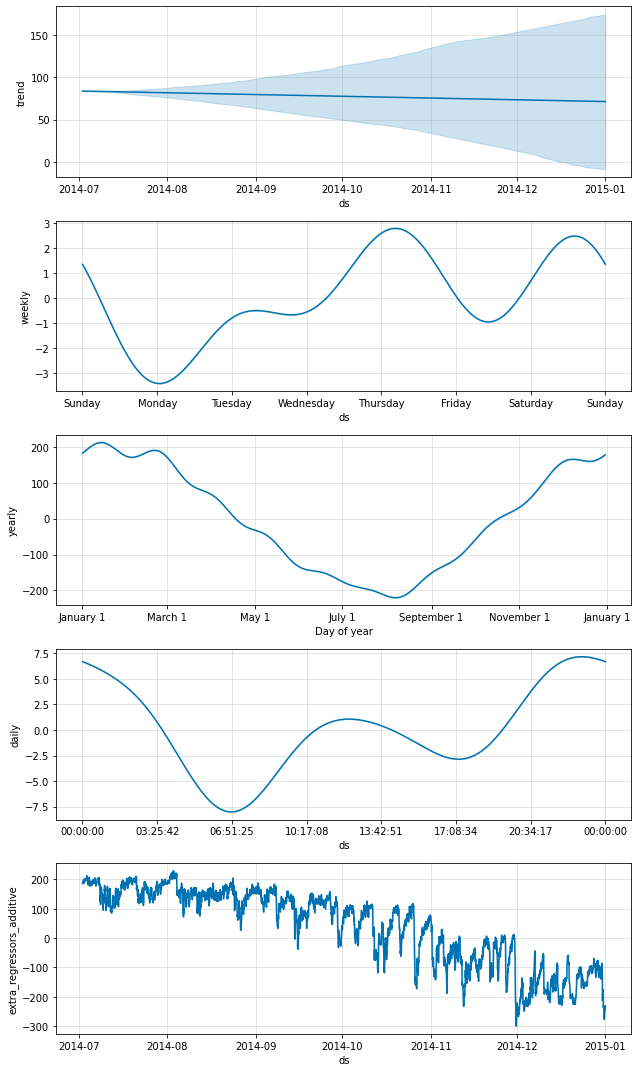

In [ ]:
model.plot_components(result)

## **Reframe dataset for supervised learning**

In [ ]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j + 1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i)[0])
        if i == 0:
            names += ['var1(t)' ]
        else:
            names += [('var1(t+%d)' % (i))]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [ ]:
pastStep = 24 # modify here to choose past steps
maxFutureStep = 24  # modify here to choose future steps
futureStep = 1


# frame as supervised learning
reframed = series_to_supervised(df.values, pastStep, futureStep)
reframed['ds'] = df_processed['ds'][pastStep:]
reframed_processed = reframed.rename({'var1(t)':'y'}, axis='columns')


print(reframed_processed.shape)
print(reframed_processed.head())

(43800, 194)
    var1(t-24)  var2(t-24)  var3(t-24)  ...  var8(t-1)      y                   ds
24         0.0       -21.0       -11.0  ...        0.0  129.0  2010-01-02 00:00:00
25         0.0       -21.0       -12.0  ...        0.0  148.0  2010-01-02 01:00:00
26         0.0       -21.0       -11.0  ...        0.0  159.0  2010-01-02 02:00:00
27         0.0       -21.0       -14.0  ...        0.0  181.0  2010-01-02 03:00:00
28         0.0       -20.0       -12.0  ...        0.0  138.0  2010-01-02 04:00:00

[5 rows x 194 columns]


In [ ]:
# use first 90% data to train
n_train_hours = int(len(df_processed) * 0.9)
train = reframed_processed[:n_train_hours]
test = reframed_processed[n_train_hours:]

y_true = test['y'].values
test = test.drop(['y'], axis=1)

print("train shape:", train.shape)
print("test shape:", test.shape)
print("y_true shape:", y_true.shape)

train shape: (39441, 194)
test shape: (4359, 193)
y_true shape: (4359,)


In [ ]:
model = Prophet(interval_width=0.95)

names = list()
for i in range(pastStep, 0, -1):
  names += [('var%d(t-%d)' % (j + 1, i)) for j in range(8)]

for variable in names:
  model.add_regressor(variable)

In [ ]:
model.fit(train)

In [ ]:
result = model.predict(test)
prediction = result['yhat']
print("prediction shape:", prediction.shape)

prediction shape: (4359,)


In [ ]:
rmse = sqrt(mean_squared_error(prediction, y_true))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 21.532


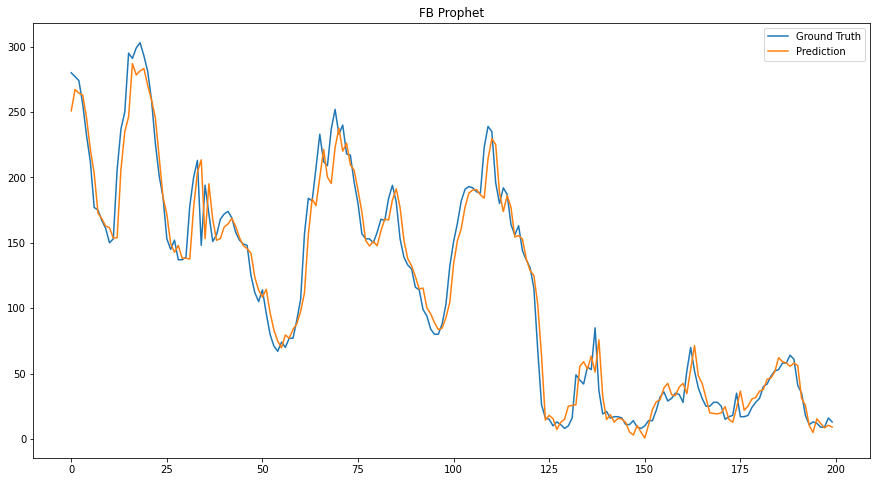

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(y_true[:200], label='Ground Truth')
plt.plot(prediction[:200], label='Prediction')
plt.title("FB Prophet")
plt.legend()
plt.show()

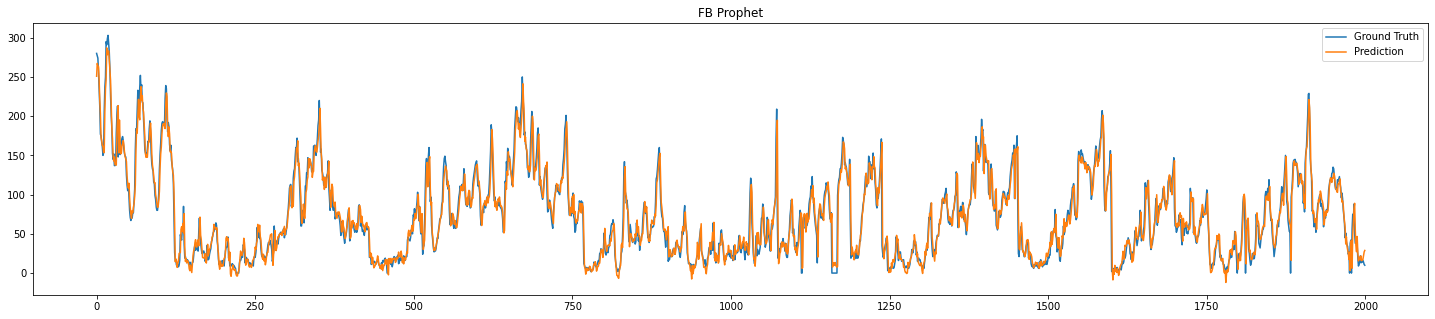

In [ ]:
plt.figure(figsize=(25, 5))
plt.plot(y_true[:2000], label='Ground Truth')
plt.plot(prediction[:2000], label='Prediction')
plt.title("FB Prophet")
plt.legend()
plt.show()